In [9]:
import pandas as pd
from sklearn.model_selection import train_test_split

data = pd.read_csv("Qualitative_Bankruptcy.csv")
data.head()

,Industrial Risk,Management Risk,Financial Flexibility,Credibility,Competitiveness,Operating Risk,Class
0,P,P,A,A,A,P,NB
1,N,N,A,A,A,N,NB
2,A,A,A,A,A,A,NB
3,P,P,P,P,P,P,NB
4,N,N,P,P,P,N,NB


In [10]:
estados = {'P': 0, 'N': 1, 'A': 2}


In [11]:
data['Industrial Risk'] = data['Industrial Risk'].map(estados)
data['Management Risk'] = data['Management Risk'].map(estados)
data['Financial Flexibility'] = data['Financial Flexibility'].map(estados)
data['Credibility'] = data['Credibility'].map(estados)
data['Competitiveness'] = data['Competitiveness'].map(estados)
data['Operating Risk'] = data['Operating Risk'].map(estados)


In [12]:
data

,Industrial Risk,Management Risk,Financial Flexibility,Credibility,Competitiveness,Operating Risk,Class
0,0,0,2,2,2,0,NB
1,1,1,2,2,2,1,NB
2,2,2,2,2,2,2,NB
3,0,0,0,0,0,0,NB
4,1,1,0,0,0,1,NB
...,...,...,...,...,...,...,...
245,1,1,2,1,1,1,B
246,0,1,1,1,1,1,B
247,2,1,1,1,1,1,B
248,1,1,1,1,1,1,B


In [13]:
X = data.drop("Class", axis=1)                
y = data["Class"]                             

In [14]:
N = len(X)
k = 10 
L = 20


In [15]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size= k/N,
    train_size= L/N,
    random_state = 42,
    stratify=y
)

In [16]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier(
    criterion = "entropy",
    random_state = 42
)

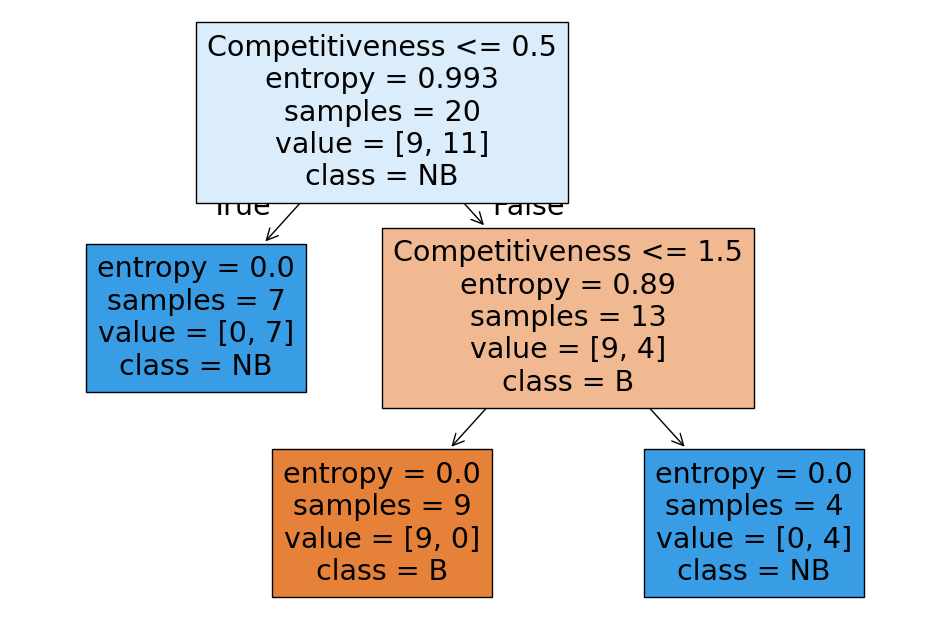

In [17]:
model.fit(X_train, y_train)

#Visualización
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(12,8))
plot_tree(model, feature_names = X.columns,
          class_names=['B', 'NB'], filled=True)
plt.show()

In [18]:
from sklearn.tree import export_text

r = export_text(model, feature_names=list(X.columns))
print(r)


|--- Competitiveness <= 0.50
|   |--- class: NB
|--- Competitiveness >  0.50
|   |--- Competitiveness <= 1.50
|   |   |--- class: B
|   |--- Competitiveness >  1.50
|   |   |--- class: NB



In [19]:
X_test

,Industrial Risk,Management Risk,Financial Flexibility,Credibility,Competitiveness,Operating Risk
52,2,1,2,2,0,1
190,1,1,1,1,1,1
21,2,2,2,0,2,2
37,2,1,2,0,0,2
221,2,1,1,1,1,1
154,0,1,1,1,1,1
136,0,1,0,0,0,0
143,2,1,1,1,1,2
68,0,0,0,2,0,1
17,1,1,0,0,2,1


In [20]:
X_train

,Industrial Risk,Management Risk,Financial Flexibility,Credibility,Competitiveness,Operating Risk
117,0,0,2,2,0,0
213,2,1,1,1,1,1
242,1,1,1,1,1,2
147,1,1,1,1,1,1
129,2,2,2,0,2,2
209,2,2,1,1,1,1
7,0,0,0,2,2,0
94,0,2,0,1,0,1
20,2,2,0,2,2,2
63,2,1,1,0,0,2


In [21]:
from sklearn.metrics import confusion_matrix, accuracy_score

y_pred = model.predict(X_test)
print("Matriz de confusión: \n", confusion_matrix(y_test, y_pred))
print("Accuracy: ", accuracy_score(y_test, y_pred))

Matriz de confusión: 
 [[4 0]
 [0 6]]
Accuracy:  1.0


In [22]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(model, X, y, cv=10, scoring="accuracy")
print("Accuracy promedio:", scores.mean())

Accuracy promedio: 0.9960000000000001
